<a href="https://colab.research.google.com/github/knowhrishi/DLTA/blob/main/Trial_for_Bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"dalalyash","key":"57c07eb395c04112f15993a208d7c448"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c g-research-crypto-forecasting

  0% 0.00/59.0 [00:00<?, ?B/s]
100% 59.0/59.0 [00:00<00:00, 102kB/s]
  0% 0.00/660k [00:00<?, ?B/s]
100% 660k/660k [00:00<00:00, 43.0MB/s]
  0% 0.00/406 [00:00<?, ?B/s]
100% 406/406 [00:00<00:00, 394kB/s]
  0% 0.00/5.78k [00:00<?, ?B/s]
100% 5.78k/5.78k [00:00<00:00, 6.07MB/s]
 99% 1.01G/1.02G [00:07<00:00, 171MB/s]
100% 1.02G/1.02G [00:07<00:00, 152MB/s]
  0% 0.00/444 [00:00<?, ?B/s]
100% 444/444 [00:00<00:00, 463kB/s]
 84% 86.0M/103M [00:00<00:00, 152MB/s]
100% 103M/103M [00:00<00:00, 175MB/s] 


In [ ]:
!mkdir train
!unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_df = pd.read_csv('/content/train/train.csv')
train_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [ ]:
crypto_data_train = train_df.copy()

In [ ]:
asset_details = pd.read_csv('/content/asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [ ]:
bitcoin_df = train_df[train_df.Asset_ID == 1]
ethereum_df = train_df[train_df.Asset_ID == 6]
monero_df = train_df[train_df.Asset_ID == 11]
dogecoin_df = train_df[train_df.Asset_ID == 4]
binance_df = train_df[train_df.Asset_ID == 0]

In [ ]:
print("Bitcoin shape",bitcoin_df.shape)
print("Ethereum shape",ethereum_df.shape)
print("Monero shape",monero_df.shape)
print("Dogecoin shape",dogecoin_df.shape)
print("Binance shape",binance_df.shape)

Bitcoin shape (1956282, 10)
Ethereum shape (1956200, 10)
Monero shape (1701261, 10)
Dogecoin shape (1156866, 10)
Binance shape (1942619, 10)


In [ ]:
bitcoin_df['Close_diff'] = bitcoin_df['Close'].diff()
bitcoin_df['Range'] = (bitcoin_df['High'] - bitcoin_df['Low'])
bitcoin_df['Volume_diff'] = bitcoin_df['Volume'].diff()
bitcoin_df['Count_diff'] = bitcoin_df['Count'].diff()
bitcoin_df = bitcoin_df[1:]
bitcoin_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
10,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,-22.074,372.30,-0.503629,6.0
18,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,-26.788,399.40,24.015388,293.0
26,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,-33.274,422.72,-16.281291,-93.0
34,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,-43.126,401.46,69.721107,307.0
42,1514765160,1,554.0,13717.714,14000.7,13520.00,13717.112,70.805776,13706.952030,-0.004422,-7.802,480.70,-37.695861,-188.0
50,1514765220,1,546.0,13720.922,14001.4,13501.01,13670.940,70.762103,13683.843336,-0.008873,-46.172,500.39,-0.043673,-8.0
58,1514765280,1,437.0,13669.246,13914.6,13504.99,13721.348,78.298555,13701.600413,-0.008492,50.408,409.61,7.536453,-109.0
66,1514765340,1,288.0,13713.412,13948.9,13539.99,13720.260,60.100796,13720.524584,-0.006282,-1.088,408.91,-18.197759,-149.0
74,1514765400,1,270.0,13713.610,13948.5,13530.00,13719.902,56.578007,13711.904983,-0.003889,-0.358,418.50,-3.522790,-18.0
82,1514765460,1,332.0,13719.018,13948.6,13400.01,13706.596,56.261278,13705.183348,-0.002272,-13.306,548.59,-0.316729,62.0


In [ ]:
ethereum_df['Close_diff'] = ethereum_df['Close'].diff()
ethereum_df['Range'] = (ethereum_df['High'] - ethereum_df['Low'])
ethereum_df['Volume_diff'] = ethereum_df['Volume'].diff()
ethereum_df['Count_diff'] = ethereum_df['Count'].diff()
ethereum_df = ethereum_df[1:]
ethereum_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
13,1514764920,6,192.0,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441,-0.2475,12.65,-103.194715,19.0
21,1514764980,6,120.0,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206,-0.7575,15.12,-58.655110,-72.0
29,1514765040,6,156.0,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205,-0.4000,15.76,-8.754106,36.0
37,1514765100,6,118.0,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744,-1.3975,16.69,27.694113,-38.0
45,1514765160,6,119.0,735.8425,743.80,725.00,735.2000,366.585886,734.816231,-0.001331,-0.5050,18.80,173.507847,1.0
53,1514765220,6,162.0,735.0600,744.73,725.00,734.4050,366.900033,734.549952,-0.002983,-0.7950,19.73,0.314147,43.0
61,1514765280,6,111.0,734.2300,744.03,724.43,735.0900,125.164340,734.399631,-0.004800,0.6850,19.60,-241.735693,-51.0
69,1514765340,6,96.0,735.1800,744.65,725.16,735.3500,153.346749,734.995656,-0.003183,0.2600,19.49,28.182409,-15.0
77,1514765400,6,61.0,734.9500,744.38,725.00,734.4000,98.426401,734.494907,-0.004437,-0.9500,19.38,-54.920348,-35.0
85,1514765460,6,153.0,734.6550,745.32,722.91,734.6950,180.253636,734.805637,-0.003481,0.2950,22.41,81.827236,92.0


In [ ]:
monero_df['Close_diff'] = monero_df['Close'].diff()
monero_df['Range'] = (monero_df['High'] - monero_df['Low'])
monero_df['Volume_diff'] = monero_df['Volume'].diff()
monero_df['Count_diff'] = monero_df['Count'].diff()
monero_df = monero_df[1:]
monero_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
15,1514764920,11,1.0,329.450,329.45,329.45,329.450,0.349420,329.450000,-0.009690,-0.010,0.00,-6.286291,-6.0
23,1514764980,11,3.0,329.270,329.27,329.19,329.190,1.189553,329.198979,0.006567,-0.260,0.08,0.840134,2.0
31,1514765040,11,2.0,328.160,328.16,328.16,328.160,1.512079,328.160000,-0.007299,-1.030,0.00,0.322526,-1.0
39,1514765100,11,7.0,328.180,328.18,327.43,327.430,11.997972,328.077776,-0.010619,-0.730,0.75,10.485893,5.0
47,1514765160,11,9.0,332.000,336.56,327.10,331.940,2.291827,331.898785,0.005323,4.510,9.46,-9.706145,2.0
55,1514765220,11,12.0,327.230,327.23,326.70,326.910,8.595314,326.960213,0.000548,-5.030,0.53,6.303487,3.0
63,1514765280,11,16.0,326.710,328.44,325.00,328.440,25.660247,326.173189,-0.024252,1.530,3.44,17.064934,4.0
71,1514765340,11,1.0,336.260,336.26,336.26,336.260,0.200000,336.260000,-0.011446,7.820,0.00,-25.460247,-15.0
79,1514765400,11,9.0,331.435,336.30,326.59,332.425,12.580000,332.419863,-0.001448,-3.835,9.71,12.380000,8.0
87,1514765460,11,6.0,328.920,330.13,328.05,328.060,8.650600,328.757867,-0.010711,-4.365,2.08,-3.929400,-3.0


In [ ]:
dogecoin_df['Close_diff'] = dogecoin_df['Close'].diff()
dogecoin_df['Range'] = (dogecoin_df['High'] - dogecoin_df['Low'])
dogecoin_df['Volume_diff'] = dogecoin_df['Volume'].diff()
dogecoin_df['Count_diff'] = dogecoin_df['Count'].diff()
dogecoin_df = dogecoin_df[1:]
dogecoin_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
7269154,1555079700,4,14.0,0.002772,0.002775,0.002771,0.002775,7.039900e+04,0.002773,0.007576,0.000000e+00,0.000004,-1.217100e+05,4.0
7269167,1555079760,4,7.0,0.002773,0.002775,0.002772,0.002772,2.174830e+05,0.002775,0.008655,-3.000000e-06,0.000003,1.470840e+05,-7.0
7269180,1555079820,4,7.0,0.002773,0.002775,0.002773,0.002773,4.247299e+06,0.002773,0.009373,1.000000e-06,0.000002,4.029816e+06,0.0
7269193,1555079880,4,21.0,0.002772,0.002775,0.002772,0.002774,1.733760e+05,0.002774,0.009369,1.000000e-06,0.000003,-4.073923e+06,14.0
7269206,1555079940,4,11.0,0.002774,0.002775,0.002774,0.002775,7.757548e+05,0.002775,0.011527,1.000000e-06,0.000001,6.023788e+05,-10.0
7269219,1555080000,4,4.0,0.002776,0.002776,0.002776,0.002776,1.754300e+04,0.002776,NaN,1.000000e-06,0.000000,-7.582118e+05,-7.0
7269245,1555080120,4,14.0,0.002777,0.002779,0.002776,0.002777,6.104390e+05,0.002777,0.006113,1.000000e-06,0.000003,5.928960e+05,10.0
7269259,1555080180,4,31.0,0.002780,0.002783,0.002780,0.002781,1.678659e+06,0.002782,0.005745,4.000000e-06,0.000003,1.068220e+06,17.0
7269273,1555080240,4,16.0,0.002785,0.002786,0.002783,0.002785,3.695000e+04,0.002786,0.004659,4.000000e-06,0.000003,-1.641709e+06,-15.0
7269286,1555080300,4,30.0,0.002785,0.002792,0.002785,0.002790,2.142010e+05,0.002788,0.003940,5.000000e-06,0.000007,1.772510e+05,14.0


In [ ]:
binance_df['Close_diff'] = binance_df['Close'].diff()
binance_df['Range'] = (binance_df['High'] - binance_df['Low'])
binance_df['Volume_diff'] = binance_df['Volume'].diff()
binance_df['Count_diff'] = binance_df['Count'].diff()
binance_df = binance_df[1:]
binance_df.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Close_diff,Range,Volume_diff,Count_diff
9,1514764920,0,7.0,8.5300,8.5300,8.5145,8.5145,71.39,8.520215,-0.015875,-0.0155,0.0155,-6.99,2.0
17,1514764980,0,45.0,8.5065,8.5299,8.4848,8.4848,1546.82,8.501394,-0.015410,-0.0297,0.0451,1475.43,38.0
25,1514765040,0,14.0,8.5009,8.5066,8.4744,8.5009,125.80,8.479810,-0.012524,0.0161,0.0322,-1421.02,-31.0
33,1514765100,0,5.0,8.5007,8.5007,8.4560,8.4560,125.01,8.458435,-0.005940,-0.0449,0.0447,-0.79,-9.0
41,1514765160,0,89.0,8.4560,8.4560,8.3999,8.4000,3765.25,8.403468,-0.005455,-0.0560,0.0561,3640.24,84.0
49,1514765220,0,20.0,8.4000,8.4000,8.3800,8.3958,827.17,8.390564,-0.000644,-0.0042,0.0200,-2938.08,-69.0
57,1514765280,0,25.0,8.3800,8.4544,8.3800,8.3804,370.04,8.390332,-0.003580,-0.0154,0.0744,-457.13,5.0
65,1514765340,0,16.0,8.3999,8.4519,8.3800,8.3800,1428.91,8.400632,-0.005421,-0.0004,0.0719,1058.87,-9.0
73,1514765400,0,1.0,8.3932,8.3932,8.3932,8.3932,12.00,8.393200,-0.005123,0.0132,0.0000,-1416.91,-15.0
81,1514765460,0,8.0,8.3932,8.4199,8.3794,8.3931,229.39,8.393178,-0.002974,-0.0001,0.0405,217.39,7.0


Text(0.5, 1.0, 'Binance Close Diff')

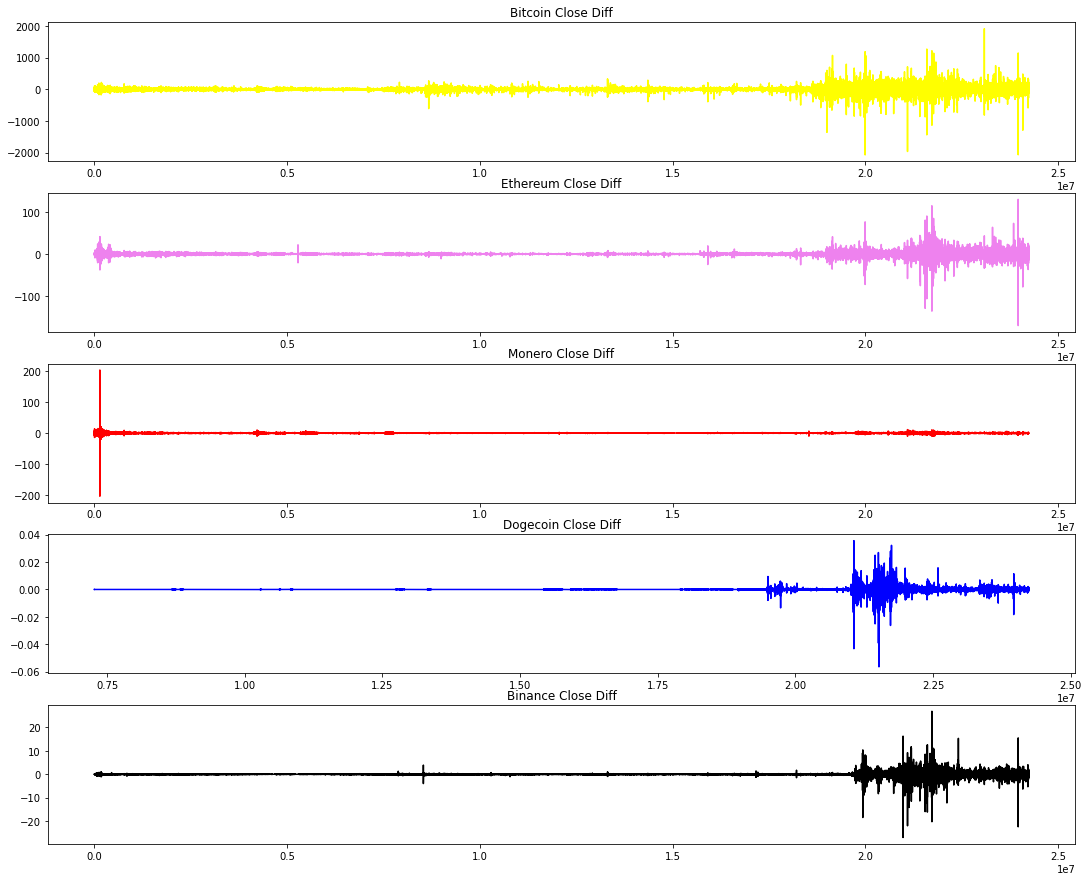

In [ ]:
fig, ax = plt.subplots(5, figsize = (15,12))
fig.tight_layout()
ax[0].plot(bitcoin_df['Close_diff'], color = 'yellow')
ax[0].set_title('Bitcoin Close Diff')
ax[1].plot(ethereum_df['Close_diff'], color = 'violet')
ax[1].set_title('Ethereum Close Diff')
ax[2].plot(monero_df['Close_diff'], color = 'red')
ax[2].set_title('Monero Close Diff')
ax[3].plot(dogecoin_df['Close_diff'], color = 'blue')
ax[3].set_title('Dogecoin Close Diff')
ax[4].plot(binance_df['Close_diff'], color = 'black')
ax[4].set_title('Binance Close Diff')

Text(0.5, 1.0, 'Binance Range')

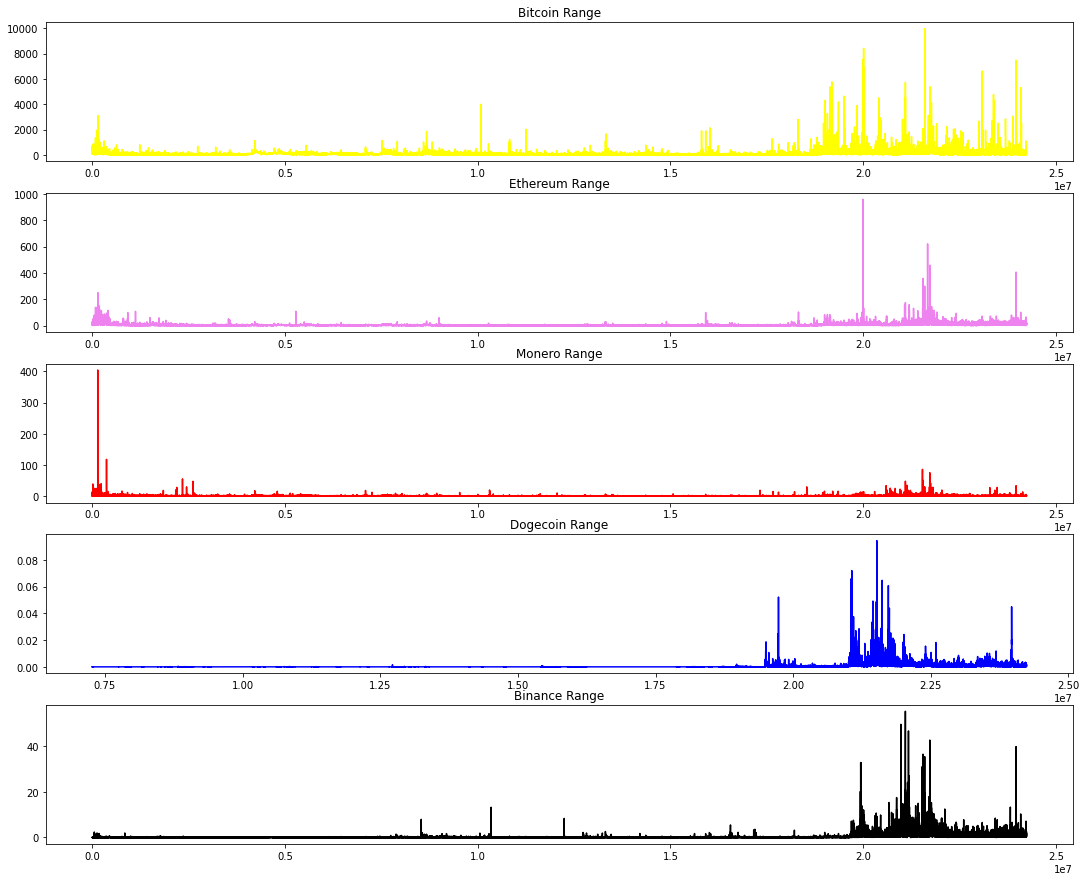

In [ ]:
fig, ax = plt.subplots(5, figsize = (15,12))
fig.tight_layout()
ax[0].plot(bitcoin_df['Range'], color = 'yellow')
ax[0].set_title('Bitcoin Range')
ax[1].plot(ethereum_df['Range'], color = 'violet')
ax[1].set_title('Ethereum Range')
ax[2].plot(monero_df['Range'], color = 'red')
ax[2].set_title('Monero Range')
ax[3].plot(dogecoin_df['Range'], color = 'blue')
ax[3].set_title('Dogecoin Range')
ax[4].plot(binance_df['Range'], color = 'black')
ax[4].set_title('Binance Range')

Text(0.5, 1.0, 'Binance Volume diff')

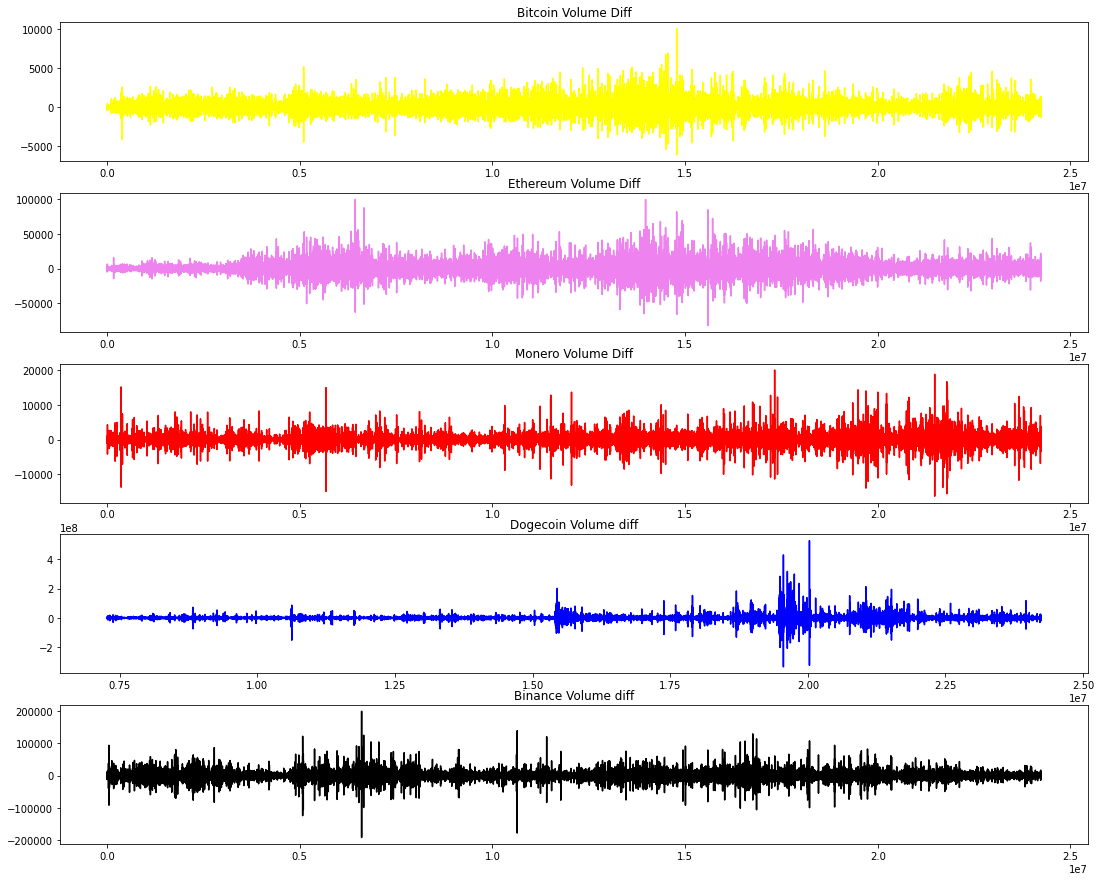

In [ ]:
fig, ax = plt.subplots(5, figsize = (15,12))
fig.tight_layout()
ax[0].plot(bitcoin_df['Volume_diff'], color = 'yellow')
ax[0].set_title('Bitcoin Volume Diff')
ax[1].plot(ethereum_df['Volume_diff'], color = 'violet')
ax[1].set_title('Ethereum Volume Diff')
ax[2].plot(monero_df['Volume_diff'], color = 'red')
ax[2].set_title('Monero Volume Diff')
ax[3].plot(dogecoin_df['Volume_diff'], color = 'blue')
ax[3].set_title('Dogecoin Volume diff')
ax[4].plot(binance_df['Volume_diff'], color = 'black')
ax[4].set_title('Binance Volume diff')

Text(0.5, 1.0, 'Binance Count diff')

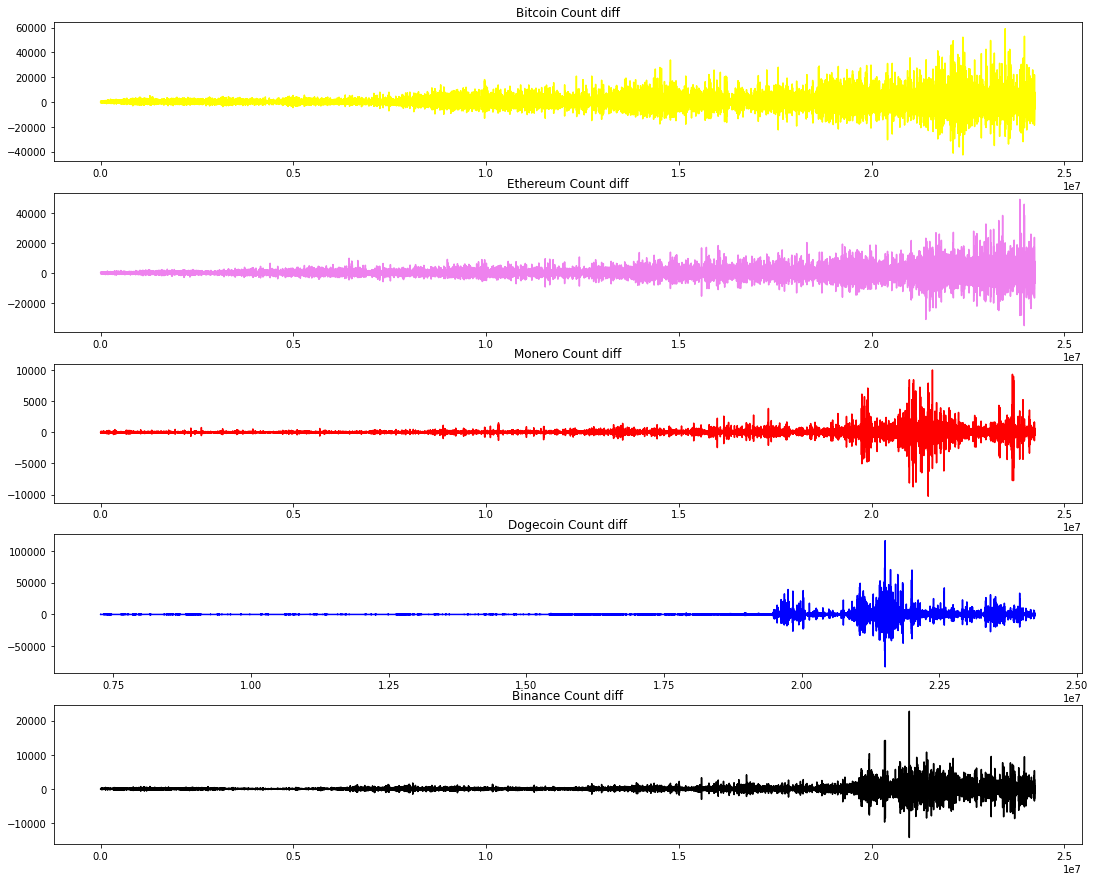

In [ ]:
fig, ax = plt.subplots(5, figsize = (15,12))
fig.tight_layout()
ax[0].plot(bitcoin_df['Count_diff'], color = 'yellow')
ax[0].set_title('Bitcoin Count diff')
ax[1].plot(ethereum_df['Count_diff'], color = 'violet')
ax[1].set_title('Ethereum Count diff')
ax[2].plot(monero_df['Count_diff'], color = 'red')
ax[2].set_title('Monero Count diff')
ax[3].plot(dogecoin_df['Count_diff'], color = 'blue')
ax[3].set_title('Dogecoin Count diff')
ax[4].plot(binance_df['Count_diff'], color = 'black')
ax[4].set_title('Binance Count diff')

## **BITCOIN**

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


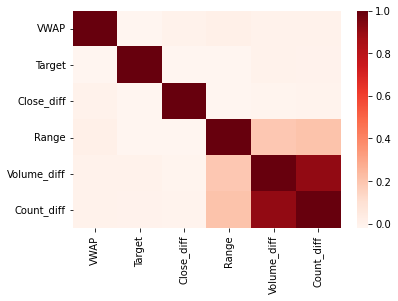

In [ ]:
#for bitcoin
bitcoin_df['Target'] = bitcoin_df['Target'].interpolate(method = 'linear')  # this function fills the null values on the basis of the linearity of values
# bitcoin_df['Target']
btc_train = bitcoin_df[bitcoin_df.timestamp >= 1622505660]
btc_test = bitcoin_df[bitcoin_df.timestamp < 1622505660]
btc_train.drop(['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume'], 1, inplace = True)
btc_test.drop(['timestamp','Asset_ID','Count','Open','High','Low','Close','Volume'], 1, inplace = True)
sns.heatmap(btc_train.corr().values, xticklabels = btc_train.columns, yticklabels = btc_train.columns, cmap = 'Reds')
plt.show()

In [ ]:
X_train_btc = btc_train.drop(['Target'],1)
y_train_btc = btc_train.Target
X_train_btc.shape, y_train_btc.shape

((161277, 5), (161277,))

In [ ]:
X_test_btc = btc_test.drop(['Target'],1)
y_test_btc = btc_test.Target
X_test_btc.shape, y_test_btc.shape

((1795004, 5), (1795004,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler(feature_range = (0, 1))
X_train_btc1 = X_scaler.fit_transform(X_train_btc)
X_test_btc1 = X_scaler.transform(X_test_btc)
X_train_btc1

array([[0.34493571, 0.5005212 , 0.01818053, 0.43597576, 0.43965018],
       [0.35138973, 0.58146226, 0.03867178, 0.41619311, 0.45069247],
       [0.3602389 , 0.55808359, 0.03080113, 0.49133616, 0.48430031],
       ...,
       [0.58064764, 0.51130903, 0.01066064, 0.41365762, 0.41887104],
       [0.58447116, 0.56736833, 0.02856806, 0.42479788, 0.43949313],
       [0.58762654, 0.51588271, 0.01020145, 0.41431446, 0.40602271]])

Epoch 1/10
5040/5040 [==============================] - 163s 32ms/step - loss: 0.0049 - val_loss: 0.0154
Epoch 2/10
5040/5040 [==============================] - 114s 23ms/step - loss: 0.0012 - val_loss: 0.0101
Epoch 3/10
5040/5040 [==============================] - 157s 31ms/step - loss: 0.0012 - val_loss: 0.0071
Epoch 4/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0012 - val_loss: 0.0045
Epoch 5/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0012 - val_loss: 0.0049
Epoch 6/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0012 - val_loss: 0.0038
Epoch 7/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 8/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 9/10
5040/5040 [==============================] - 158s 31ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 10/10
5040/5040 [==============================] 

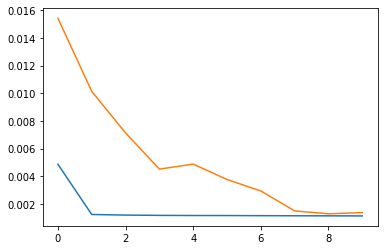

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (X_train_btc1.shape[1])),
    tf.keras.layers.Dense(5, activation='elu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss = 'mean_absolute_error', optimizer = 'adam')
history = model.fit(X_train_btc1, y_train_btc, epochs = 10, validation_data = (X_test_btc1, y_test_btc))
plt.plot(history.history['loss'], label = 'training')
plt.plot(history.history['val_loss'], label = 'test')
plt.show()

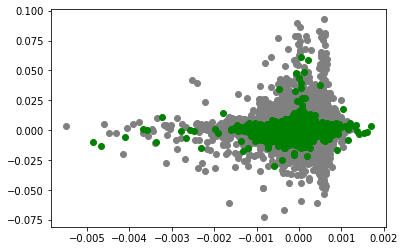

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize = (12,8))
plt.scatter(model.predict(X_test_btc1).flatten(), y_test_btc, color = 'grey')
plt.scatter(model.predict(X_train_btc1).flatten(), y_train_btc, color = 'green')
plt.show()

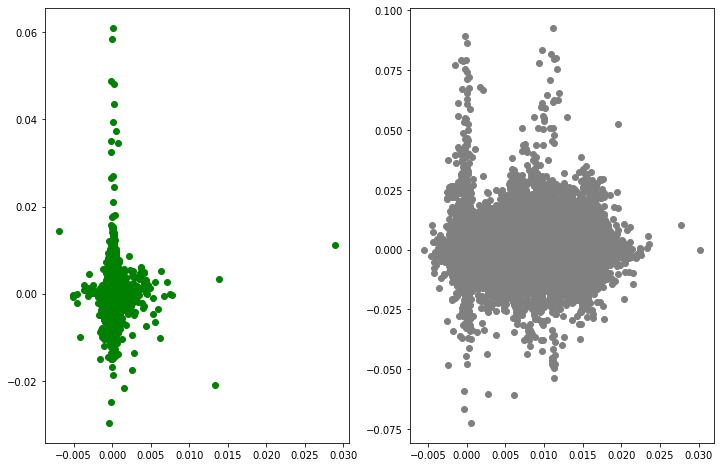

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(model.predict(X_train_btc1).flatten(), y_train_btc, color = 'green')
axs[1].scatter(model.predict(X_test_btc1).flatten(), y_test_btc, color = 'grey')
plt.show()

In [ ]:
X_train_btc1 = np.array(X_train_btc1)
X_train_btc1 = X_train_btc1.reshape(X_train_btc1.shape[0], X_train_btc1.shape[1], 1)
X_test_btc1 = np.array(X_test_btc1)
X_test_btc1 = X_test_btc1.reshape(X_test_btc1.shape[0], X_test_btc1.shape[1], 1)
X_train_btc1.shape, X_test_btc1.shape

((161277, 5, 1), (1795004, 5, 1))

In [ ]:
y_train_btc = np.array(y_train_btc)
y_train_btc = y_train_btc.reshape(-1,1)
y_test_btc = np.array(y_test_btc)
y_test_btc = y_test_btc.reshape(-1,1)
y_train_btc.shape, y_test_btc.shape

((161277, 1), (1795004, 1))

In [ ]:
import tensorflow as tf


# define a recurrent network with Gated Recurrent Units
model_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape = (X_train_btc1.shape[1], 1)),
    tf.keras.layers.GRU(5, dropout = 0.25), 
    tf.keras.layers.ELU(),
    tf.keras.layers. Dense(1)
    #tf.keras.layers.ReLU()
])

model_gru.compile(loss = 'mean_squared_error', optimizer = 'adam')
model_gru.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 elu (ELU)                   (None, 5)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model_gru.fit(X_train_btc1, y_train_btc, epochs = 3, validation_data = (X_test_btc1, y_test_btc))

Epoch 1/3
5040/5040 [==============================] - 154s 29ms/step - loss: 9.9907e-05 - val_loss: 2.0706e-05
Epoch 2/3
5040/5040 [==============================] - 226s 45ms/step - loss: 3.1967e-06 - val_loss: 1.1557e-05
Epoch 3/3
5040/5040 [==============================] - 166s 33ms/step - loss: 3.0842e-06 - val_loss: 5.7933e-06


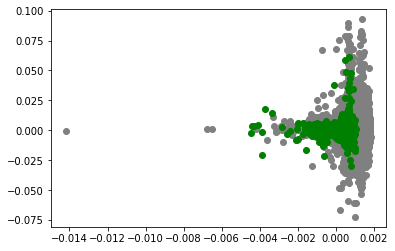

In [ ]:
#fig, axs = plt.subplots(1, 2, figsize = (12,8))
plt.scatter(model_gru.predict(X_test_btc1).flatten(), y_test_btc, color = 'grey')
plt.scatter(model_gru.predict(X_train_btc1).flatten(), y_train_btc, color = 'green')
plt.show()

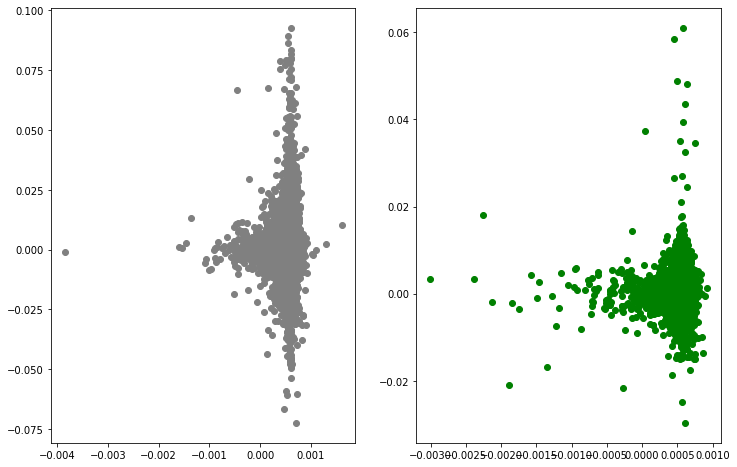

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (12,8))
axs[0].scatter(model_gru.predict(X_test_btc1).flatten(), y_test_btc, color = 'grey')
axs[1].scatter(model_gru.predict(X_train_btc1).flatten(), y_train_btc, color = 'green')
plt.show()